In [59]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import pandas as pd
import sys
import nrrd
%config Completer.use_jedi = False

# Part 1

### a. Read Image

In [63]:
# SimpleITK read 'PCC-0312_LAL_GS7.tif'
img = sitk.ReadImage('PCC-0312_LAL_GS7.tif')

def image_Info(image):
    """
    :param image: the input image read by SimpleITK
    :return: None
    This function prints the properties of the image. Properties include: size, spacing, origin, direction, pixel type
    """
    print('Size:', image.GetSize()) #size
    print('Space:', image.GetSpacing()) #space
    print('Origin:', image.GetOrigin()) #origin
    print('Direction:', image.GetDirection()) #direction
    print('Pixel Type:', image.GetPixelIDTypeAsString()) #pixel type
    
    
image_Info(img)

Size: (512, 10048)
Space: (0.35277777777777775, 0.35277777777777775)
Origin: (0.0, 0.0)
Direction: (1.0, 0.0, 0.0, 1.0)
Pixel Type: 8-bit unsigned integer


In [40]:
# Set external viewer to 3D slicer and Open with external viewer
image_viewer = sitk.ImageViewer()
image_viewer.SetApplication('C:/Users/Linda/AppData/Local/NA-MIC/Slicer 4.11.20210226/Slicer.exe')
image_viewer.Execute(img)

Size: (512, 10048)
Space: (0.35277777777777775, 0.35277777777777775)
Origin: (0.0, 0.0)
Direction: (1.0, 0.0, 0.0, 1.0)
Pixel Type: 8-bit unsigned integer


### Visulize the image in 3D Slicer
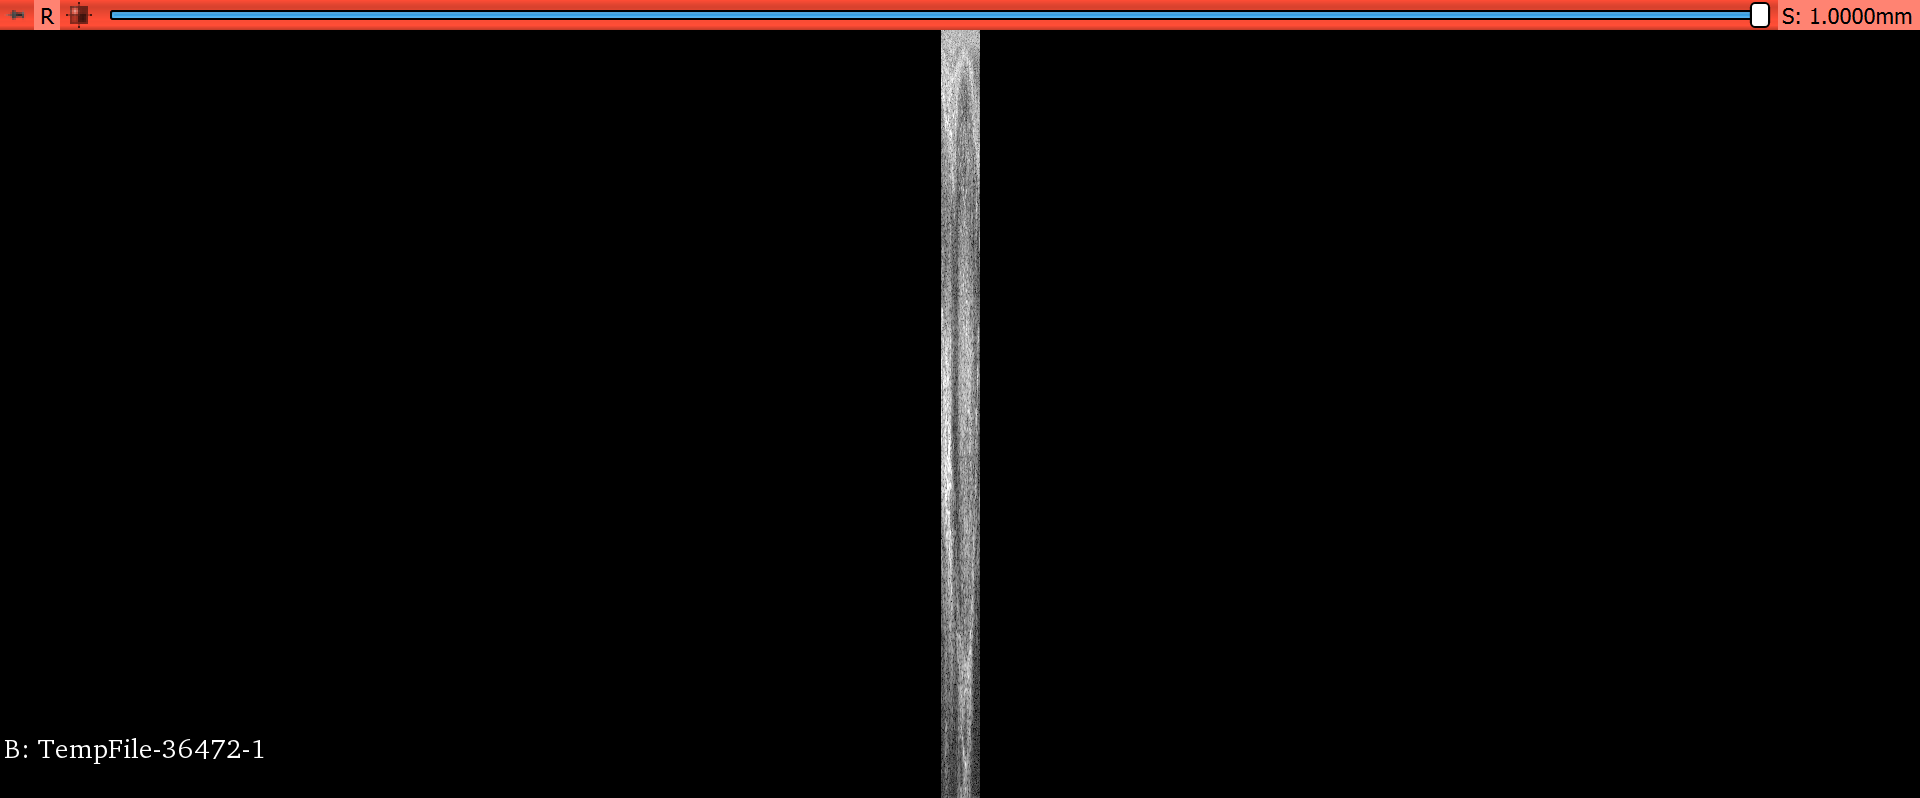

### b. Read .csv

In [64]:
# Read meta_data.csv using Pandas
data = pd.read_csv('meta_data.csv')
print(data, '\n')
print(data['axial (mm)'], '\n')
print(data['lateral (mm)'], '\n')

          data_name  axial (mm)  lateral (mm)  grade     organ    modality
0  PCC-0312_LAL_GS7          28         46.08      7  prostate  ultrasound 

0    28
Name: axial (mm), dtype: int64 

0    46.08
Name: lateral (mm), dtype: float64 



### c. Update New Spacing and Saved As .NNRD

In [65]:
# Calculate new spacing
vertical_spacing = data['axial (mm)']/img.GetSize()[0]
horizontal_spacing = data['lateral (mm)']/img.GetSize()[1]
new_spacing = (float(horizontal_spacing), float(vertical_spacing))
print(new_spacing)
# Update new spacing to .csv
data['spacing'] = new_spacing
# Save it as prostate_ultrasound.nrrd
#pd.
ratio = (data['lateral (mm)']/data['axial (mm)'])
print('lateral to axial ratio is:', ratio)

(0.0045859872611464965, 0.0546875)


ValueError: Length of values (2) does not match length of index (1)

### d. prostate_ultrasound.nrrd in 3D Slicer

In [ ]:
image_viewer.Execute(prostate_img)

### Visualize 'prostate_ultrasound.nrrd'

